In [1]:
import cv2
import os
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from keras import layers, Input, models, optimizers
from keras.models import Model, Sequential
from keras.layers import MaxPooling2D, Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing import image

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\ten

In [3]:
save_dir = str('./data/style/')
               
for folder_name in os.listdir(u'./data/style_img'):
    num = 0
    img_dir = './data/style_img/' + folder_name +'/'
    
    try:
        for img_name in os.listdir(img_dir):
            img = cv2.imread(img_dir + img_name)
            img = cv2.resize(img, (150,150))
            new_name = save_dir + folder_name + str(num) + '.jpg'
            cv2.imwrite(new_name, img) 
            num += 1
    except:
        print(img_name)



In [2]:
original_dataset_dir = './data/style/'

base_dir = './data/style_train'
# os.mkdir(base_dir)

In [3]:
train_dir = os.path.join(base_dir,'train')
# os.mkdir(train_dir)

validation_dir = os.path.join(base_dir,'validation')
# os.mkdir(validation_dir)

test_dir = os.path.join(base_dir,'test')
# os.mkdir(test_dir)

In [6]:
train_casual_dir = os.path.join(train_dir, 'casual')
os.mkdir(train_casual_dir)

train_feminine_dir = os.path.join(train_dir, 'feminine')
os.mkdir(train_feminine_dir)

train_formal_dir = os.path.join(train_dir, 'formal')
os.mkdir(train_formal_dir)

train_hip_dir = os.path.join(train_dir, 'hip')
os.mkdir(train_hip_dir)

In [7]:
validation_casual_dir = os.path.join(validation_dir, 'casual')
os.mkdir(validation_casual_dir)

validation_feminine_dir = os.path.join(validation_dir, 'feminine')
os.mkdir(validation_feminine_dir)

validation_formal_dir = os.path.join(validation_dir, 'formal')
os.mkdir(validation_formal_dir)

validation_hip_dir = os.path.join(validation_dir, 'hip')
os.mkdir(validation_hip_dir)

In [8]:
test_casual_dir = os.path.join(test_dir, 'casual')
os.mkdir(test_casual_dir)

test_feminine_dir = os.path.join(test_dir, 'feminine')
os.mkdir(test_feminine_dir)

test_formal_dir = os.path.join(test_dir, 'formal')
os.mkdir(test_formal_dir)

test_hip_dir = os.path.join(test_dir, 'hip')
os.mkdir(test_hip_dir)

In [9]:
fnames = ['casual{}.jpg'.format(i) for i in range(304)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_casual_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['casual{}.jpg'.format(i) for i in range(304,456)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_casual_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['casual{}.jpg'.format(i) for i in range(456,608)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_casual_dir, fname)
    shutil.copyfile(src,dst)

In [10]:
fnames = ['feminine{}.jpg'.format(i) for i in range(244)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_feminine_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['feminine{}.jpg'.format(i) for i in range(244,366)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_feminine_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['feminine{}.jpg'.format(i) for i in range(366,488)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_feminine_dir, fname)
    shutil.copyfile(src,dst)

In [11]:
fnames = ['formal{}.jpg'.format(i) for i in range(264)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_formal_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['formal{}.jpg'.format(i) for i in range(264,396)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_formal_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['formal{}.jpg'.format(i) for i in range(396,528)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_formal_dir, fname)
    shutil.copyfile(src,dst)

In [12]:
fnames = ['hip{}.jpg'.format(i) for i in range(228)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_hip_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['hip{}.jpg'.format(i) for i in range(228,342)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_hip_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['hip{}.jpg'.format(i) for i in range(342,456)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_hip_dir, fname)
    shutil.copyfile(src,dst)

In [15]:

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [16]:


model.compile(loss='categorical_crossentropy', #sparse_categorical_crossentropy
              optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150,150),
batch_size=10,
class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=10,
class_mode='categorical')

Found 1040 images belonging to 4 classes.
Found 520 images belonging to 4 classes.


In [18]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
mc = ModelCheckpoint('best_model_style_421.h5', monitor='val_loss', mode='min', save_best_only=True)

In [19]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/50
100/100 [==============================] - 63s 627ms/step - loss: 1.3328 - acc: 0.3470 - val_loss: 1.2656 - val_acc: 0.3560
Epoch 2/50
100/100 [==============================] - 63s 633ms/step - loss: 1.2485 - acc: 0.4160 - val_loss: 1.3145 - val_acc: 0.3260
Epoch 3/50
100/100 [==============================] - 66s 660ms/step - loss: 1.1611 - acc: 0.4940 - val_loss: 1.0910 - val_acc: 0.3640
Epoch 4/50
100/100 [==============================] - 74s 744ms/step - loss: 1.1249 - acc: 0.5160 - val_loss: 1.3172 - val_acc: 0.3960
Epoch 5/50
100/100 [==============================] - 74s 737ms/step - loss: 1.0581 - acc: 0.5540 - val_loss: 2.0170 - val_acc: 0.3900
Epoch 6/50
 80/100 [=======================>......] - ETA: 13s - loss: 1.0066 - acc: 0.5950

KeyboardInterrupt: 

In [87]:
model.save('style99.h5')

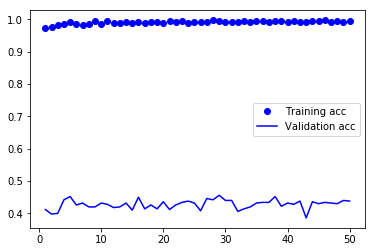

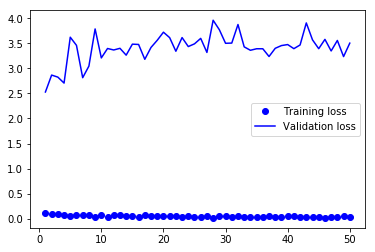

In [88]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
# plt.tilte('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
# plt.tilte('Training and validation loss')
plt.legend()

plt.show()

NameError: name 'history' is not defined

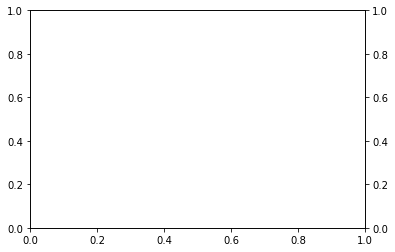

In [1]:
# 학습 과정 정확도, 손실함수 변화 그래프로 보기

import matplotlib.pyplot as plt
 
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
 
loss_ax.plot(history.history['loss'], 'y', label='train loss')
#loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
##loss_ax.set_ylim([0.0, 0.5])
 
acc_ax.plot(history.history['acc'], 'b', label='train acc')
#acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
##acc_ax.set_ylim([0.8, 1.0])
 
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
 
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
 
plt.show()

In [90]:
# output = classifier.predict_generator(test_set, steps=5)
# print(test_set.class_indices)
# print(output)
 
# 모델 평가하기
print("-- Evaluate --")
 
scores = model.evaluate_generator(
            validation_set,
            steps = 10)
 
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
 
# 모델 예측하기
print("-- Predict --")
 
output = model.predict_generator(
            validation_set,
            steps = 100)
print(validation_set.class_indices)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
 

-- Evaluate --


NameError: name 'validation_set' is not defined

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,                              #사진 회전시킬 각도
    width_shift_range=0.2,                          # 평행이동 범위
    height_shift_range=0.2,
    shear_range=0.2,                                # 전단변환
    zoom_range=0.2,                                 # 확대
    horizontal_flip=True,                           # 수평대칭
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 1040 images belonging to 4 classes.
Found 520 images belonging to 4 classes.
Epoch 1/100
100/100 [==============================] - 122s 1s/step - loss: 1.3250 - acc: 0.3453 - val_loss: 1.3160 - val_acc: 0.3847
Epoch 2/100
100/100 [==============================] - 124s 1s/step - loss: 1.2593 - acc: 0.4225 - val_loss: 1.3261 - val_acc: 0.3853
Epoch 3/100
100/100 [==============================] - 129s 1s/step - loss: 1.2207 - acc: 0.4466 - val_loss: 1.3381 - val_acc: 0.3872
Epoch 4/100
100/100 [==============================] - 120s 1s/step - loss: 1.2096 - acc: 0.4466 - val_loss: 1.3478 - val_acc: 0.3911
Epoch 5/100
100/100 [==============================] - 119s 1s/step - loss: 1.1856 - acc: 0.4662 - val_loss: 1.3719 - val_acc: 0.3847
Epoch 6/100
100/100 [==============================] - 121s 1s/step - loss: 1.1666 - acc: 0.4797 - val_loss: 1.3243 - val_acc: 0.3988
Epoch 7/100
100/100 [==============================] - 121s 1s/step - loss: 1.1586 - acc: 0.4750 - val_loss: 1.35

100/100 [==============================] - 121s 1s/step - loss: 0.8373 - acc: 0.6425 - val_loss: 2.9827 - val_acc: 0.2809
Epoch 62/100
100/100 [==============================] - 122s 1s/step - loss: 0.8464 - acc: 0.6356 - val_loss: 3.1282 - val_acc: 0.2642
Epoch 63/100
100/100 [==============================] - 121s 1s/step - loss: 0.8138 - acc: 0.6591 - val_loss: 3.1614 - val_acc: 0.2680
Epoch 64/100
100/100 [==============================] - 124s 1s/step - loss: 0.8285 - acc: 0.6559 - val_loss: 3.3616 - val_acc: 0.2700
Epoch 65/100
100/100 [==============================] - 128s 1s/step - loss: 0.8094 - acc: 0.6584 - val_loss: 2.7501 - val_acc: 0.3015
Epoch 66/100
100/100 [==============================] - 122s 1s/step - loss: 0.8329 - acc: 0.6422 - val_loss: 2.5996 - val_acc: 0.2899
Epoch 67/100
100/100 [==============================] - 119s 1s/step - loss: 0.8090 - acc: 0.6541 - val_loss: 3.5432 - val_acc: 0.2616
Epoch 68/100
100/100 [==============================] - 120s 1s/step

KeyboardInterrupt: 